## Clustering NFL Data

* Here is a demo on clustering data and identifying important factors. the example is focused on the National Footbal League (NFL) data provided by the yellowbrick database

* The dataset is comprised of statistics on all eligible receivers from the 2018 NFL regular season.


In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

In [2]:
from yellowbrick.datasets import load_nfl

nfl = load_nfl(return_dataset=True, data_home='.')

In [3]:
print(nfl.README)

# NFL Receiver Statistics from the 2018 Regular Season

**Downloaded from Pro-Football-Reference on June 18, 2019.**

- Multivariate Data Set
- 494 Instances
- 20 attributes
- Well suited for _clustering_ tasks
- [https://www.pro-football-reference.com/years/2018/receiving.htm](https://www.pro-football-reference.com/years/2018/receiving.htm)

## Abstract

This dataset is comprised of statistics on all eligible receivers from the 2018 NFL regular season.

## Description

The dataset consists of an aggregate of all relevant statistics for eligible receivers that played in at least 1 game and had at least 1 target throughout the season. This is not limited to players specifically designated as wide-receivers, but may include other positions such as running-backs and tight-ends.

## Attributes

- Player : player name
- Id : PFR player id
- Tm : team
- Age : age
- G : games count
- GS : games started count
- Tgt : number of targets
- Rec : number of receptions
- Ctch_Rate : catch rate (Rec 

* Convert the data to a `DataFrame`

In [43]:
# Chk for nan, clean the data
df.isnull().sum().sum()

0

In [4]:
df = nfl.to_dataframe()
df

,Rk,Player,Id,Tm,Age,G,GS,Tgt,Rec,Ctch_Rate,...,FirstTeamAllPro,C_pos,CB_pos,DT_pos,FB_pos,QB_pos,RB_pos,T_pos,TE_pos,WR_pos
0,1,Michael Thomas,ThomMi05,NOR,25,16,16,147,125,0.850,...,1,0,0,0,0,0,0,0,0,1
1,2,Zach Ertz,ErtzZa00,PHI,28,16,16,156,116,0.744,...,0,0,0,0,0,0,0,0,1,0
2,3,DeAndre Hopkins,HopkDe00,HOU,26,16,16,163,115,0.706,...,1,0,0,0,0,0,0,0,0,1
3,4,Julio Jones,JoneJu02,ATL,29,16,16,170,113,0.665,...,0,0,0,0,0,0,0,0,0,1
4,5,Adam Thielen,ThieAd00,MIN,28,16,16,153,113,0.739,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,490,Tim White,WhitTi00,BAL,24,3,0,1,1,1.000,...,0,0,0,0,0,0,0,0,0,0
490,491,Jonathan Williams,WillJo07,NOR,24,3,0,1,1,1.000,...,0,0,0,0,0,0,0,0,0,0
491,492,Kyle Williams,WillKy20,BUF,35,16,16,1,1,1.000,...,0,0,0,1,0,0,0,0,0,0
492,493,Russell Wilson,WilsRu00,SEA,30,16,16,1,1,1.000,...,0,0,0,0,0,1,0,0,0,0


* Encrypt the name data

In [5]:
def hash_name(name):
    return hashlib.sha256(name.encode()).hexdigest()

# Apply the hash function to the Player column
if 'Player' in df.columns:
    df['Player'] = df['Player'].apply(hash_name)

df.drop('Id', axis=1, inplace=True)
# Display the DataFrame
df.head()

,Rk,Player,Tm,Age,G,GS,Tgt,Rec,Ctch_Rate,Yds,...,FirstTeamAllPro,C_pos,CB_pos,DT_pos,FB_pos,QB_pos,RB_pos,T_pos,TE_pos,WR_pos
0,1,36d1dcc21cd041c140d88353146309d21f2e424a1301aa...,NOR,25,16,16,147,125,0.850,1405,...,1,0,0,0,0,0,0,0,0,1
1,2,baaecde2587e1c4ea83eb9f39116294aa6b21473c925a1...,PHI,28,16,16,156,116,0.744,1163,...,0,0,0,0,0,0,0,0,1,0
2,3,9f819c9d9d341c304ae42066a46bc72b05c88ed8329393...,HOU,26,16,16,163,115,0.706,1572,...,1,0,0,0,0,0,0,0,0,1
3,4,6e53c591b71bbe53a49c0967b53f1e18d9fbe4f13d8aa3...,ATL,29,16,16,170,113,0.665,1677,...,0,0,0,0,0,0,0,0,0,1
4,5,eee5b9da6d68f761071ec8cf370274de901cb5cbd3addf...,MIN,28,16,16,153,113,0.739,1373,...,0,0,0,0,0,0,0,0,0,1


* Differences in variance affect k-means clustering, so we'll investigate the variance among columns.

In [8]:
df.describe()

,Rk,Age,G,GS,Tgt,Rec,Ctch_Rate,Yds,Y/R,TD,...,FirstTeamAllPro,C_pos,CB_pos,DT_pos,FB_pos,QB_pos,RB_pos,T_pos,TE_pos,WR_pos
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,...,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.00000,494.000000,494.000000,494.000000
mean,247.500000,26.028340,12.012146,5.682186,34.692308,23.202429,0.701964,263.698381,10.523077,1.714575,...,0.014170,0.004049,0.004049,0.002024,0.038462,0.026316,0.15587,0.010121,0.220648,0.336032
std,142.749781,3.232569,4.353527,5.339414,37.216793,25.217502,0.162884,317.245031,5.865255,2.402144,...,0.118311,0.063564,0.063564,0.044992,0.192503,0.160235,0.36310,0.100196,0.415104,0.472829
min,1.000000,21.000000,1.000000,0.000000,1.000000,1.000000,0.200000,-11.000000,-11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,124.250000,24.000000,9.000000,1.000000,6.000000,4.000000,0.600000,38.000000,7.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,247.500000,25.000000,14.000000,4.000000,23.000000,14.000000,0.688000,144.500000,10.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,370.750000,28.000000,16.000000,10.000000,49.000000,34.000000,0.786500,376.250000,12.875000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,494.000000,41.000000,16.000000,16.000000,170.000000,125.000000,1.000000,1677.000000,66.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


* The variance varies a lot, so we'll employ `StandardScaler`.

In [48]:
from sklearn.preprocessing import StandardScaler

# Exclude the 'Player' and 'Tm' columns for scaling
columns_to_scale = df.columns.drop(['Player', 'Tm', 'Rk'])
scaler = StandardScaler()

# Scale only the columns that are not 'Player' and 'Tm'
scaled_columns = scaler.fit_transform(df[columns_to_scale])

# Create a new DataFrame from the scaled data
scaled_df = pd.DataFrame(scaled_columns, index=df.index, columns=columns_to_scale)

# Add the unscaled 'Player' and 'Tm' columns back to the DataFrame
# scaled_df['Player'] = df['Player']
# scaled_df['Tm'] = df['Tm']
# scaled_df['Rk'] = df['Rk']

# # Reorder the columns if needed
# column_order = ['Rk','Player', 'Tm'] + [col for col in df.columns if col not in ['Rk','Player', 'Tm']]
# scaled_df = scaled_df[column_order]

# Display the scaled DataFrame
scaled_df.head()


C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

,Age,G,GS,Tgt,Rec,Ctch_Rate,Yds,Y/R,TD,Lng,...,FirstTeamAllPro,C_pos,CB_pos,DT_pos,FB_pos,QB_pos,RB_pos,T_pos,TE_pos,WR_pos
0,-0.318441,0.916934,1.934346,3.020721,4.040874,0.909766,3.601187,0.115529,3.035959,2.034711,...,8.340949,-0.063758,-0.063758,-0.045038,-0.2,-0.164399,-0.429712,-0.101118,-0.532087,1.405668
1,0.610554,0.916934,1.934346,3.262792,3.683618,0.258337,2.837596,-0.089273,2.619242,0.162378,...,-0.119890,-0.063758,-0.063758,-0.045038,-0.2,-0.164399,-0.429712,-0.101118,1.879391,-0.711405
2,-0.008776,0.916934,1.934346,3.451070,3.643923,0.024806,4.128127,0.542200,3.869393,0.901457,...,8.340949,-0.063758,-0.063758,-0.045038,-0.2,-0.164399,-0.429712,-0.101118,-0.532087,1.405668
3,0.920219,0.916934,1.934346,3.639348,3.564532,-0.227162,4.459437,0.729936,2.619242,1.344904,...,-0.119890,-0.063758,-0.063758,-0.045038,-0.2,-0.164399,-0.429712,-0.101118,-0.532087,1.405668
4,0.610554,0.916934,1.934346,3.182102,3.564532,0.227609,3.500216,0.286198,3.035959,1.837624,...,-0.119890,-0.063758,-0.063758,-0.045038,-0.2,-0.164399,-0.429712,-0.101118,-0.532087,1.405668


In [49]:
scaled_df.describe()

,Age,G,GS,Tgt,Rec,Ctch_Rate,Yds,Y/R,TD,Lng,...,FirstTeamAllPro,C_pos,CB_pos,DT_pos,FB_pos,QB_pos,RB_pos,T_pos,TE_pos,WR_pos
count,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,494.000000,4.940000e+02,4.940000e+02,4.940000e+02,...,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02
mean,1.006842e-16,2.301353e-16,2.876691e-17,-1.150676e-16,0.000000,2.301353e-16,0.000000,2.876691e-17,5.753382e-17,5.753382e-17,...,-6.472555e-17,3.595864e-18,5.393796e-18,-1.797932e-17,-1.438346e-17,4.315037e-17,-1.438346e-17,-5.034210e-17,-2.876691e-17,1.150676e-16
std,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014,1.001014e+00,1.001014,1.001014e+00,1.001014e+00,1.001014e+00,...,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00
min,-1.557101e+00,-2.532041e+00,-1.065275e+00,-9.062162e-01,-0.881330,-3.084844e+00,-0.866765,-3.673309e+00,-7.144922e-01,-2.054859e+00,...,-1.198904e-01,-6.375767e-02,-6.375767e-02,-4.503773e-02,-2.000000e-01,-1.643990e-01,-4.297119e-01,-1.011185e-01,-5.320873e-01,-7.114053e-01
25%,-6.281061e-01,-6.925876e-01,-8.777991e-01,-7.717321e-01,-0.762244,-6.266226e-01,-0.712154,-4.818101e-01,-7.144922e-01,-7.245168e-01,...,-1.198904e-01,-6.375767e-02,-6.375767e-02,-4.503773e-02,-2.000000e-01,-1.643990e-01,-4.297119e-01,-1.011185e-01,-5.320873e-01,-7.114053e-01
50%,-3.184410e-01,4.570706e-01,-3.153701e-01,-3.144860e-01,-0.365292,-8.581384e-02,-0.376111,-8.927271e-02,-2.977754e-01,-2.317975e-01,...,-1.198904e-01,-6.375767e-02,-6.375767e-02,-4.503773e-02,-2.000000e-01,-1.643990e-01,-4.297119e-01,-1.011185e-01,-5.320873e-01,-7.114053e-01
75%,6.105543e-01,9.169339e-01,8.094879e-01,3.848315e-01,0.428612,5.195233e-01,0.355138,4.013990e-01,1.189414e-01,6.058253e-01,...,-1.198904e-01,-6.375767e-02,-6.375767e-02,-4.503773e-02,-2.000000e-01,-1.643990e-01,-4.297119e-01,-1.011185e-01,-5.320873e-01,1.405668e+00
max,4.636201e+00,9.169339e-01,1.934346e+00,3.639348e+00,4.040874,1.831599e+00,4.459437,9.468158e+00,5.536260e+00,3.266509e+00,...,8.340949e+00,1.568439e+01,1.568439e+01,2.220360e+01,5.000000e+00,6.082763e+00,2.327141e+00,9.889388e+00,1.879391e+00,1.405668e+00


* We are gonna use the elbow method to give us a first indication on the number of clusters.

C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

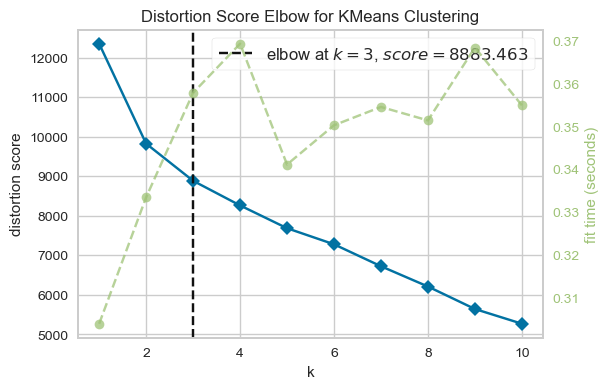

In [50]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

plt.figure(figsize=(6, 4))
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(scaled_df)
_ = visualizer.show()

* We'll also check with the silhouette method.

C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

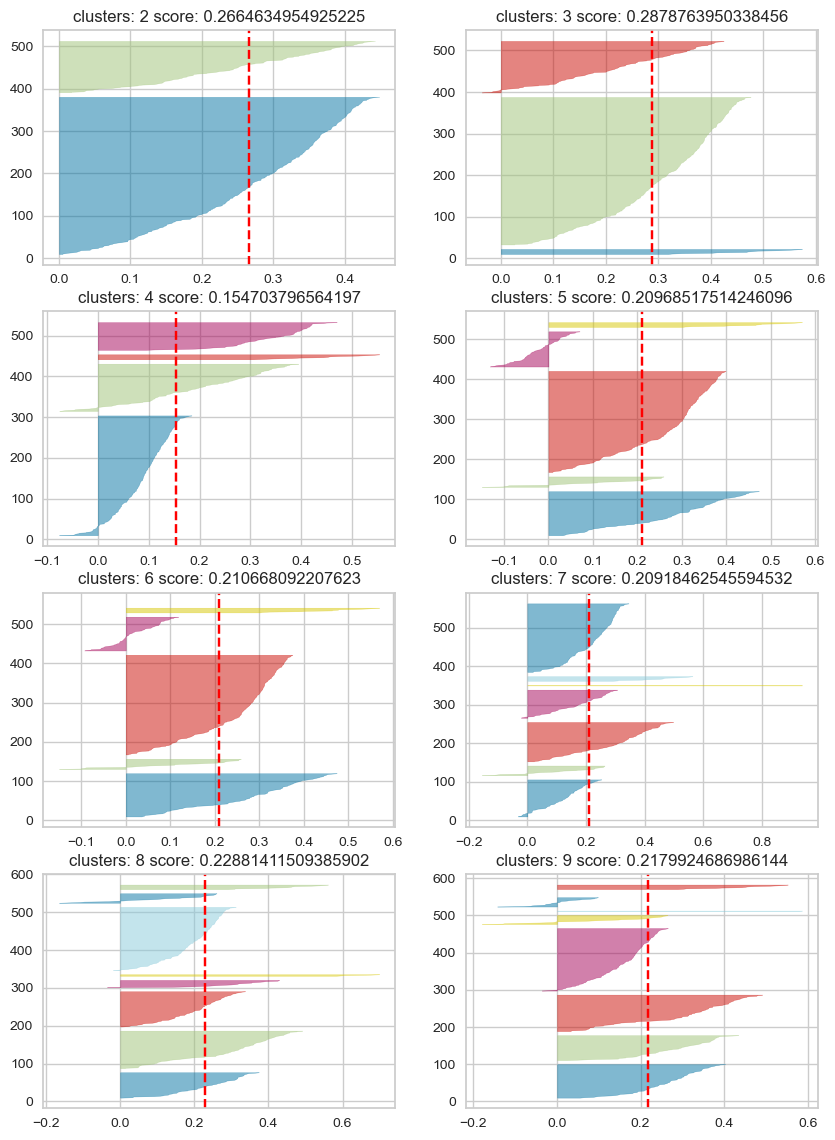

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(2.5 * 4,  1.75 * 8))

scores = {}
for n_clusters in range(2, 10):
    plt.subplot(4, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(scaled_df)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

In [52]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(3, 0.2878763950338456),
 (2, 0.2664634954925225),
 (8, 0.22881411509385902),
 (9, 0.2179924686986144),
 (6, 0.210668092207623),
 (5, 0.20968517514246096),
 (7, 0.20918462545594532),
 (4, 0.154703796564197)]

* The elbow method indicates 3 clusters, the silhouette scores goes for 3, so let's try with 3.

In [53]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_df)

C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

KMeans(n_clusters=3, random_state=0)

* In order to visualize the clusters we can perform PCA on two principal components.

* We'll project the clusters on these two, and plot the results.

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X = pca.fit_transform(scaled_df)
pca.explained_variance_ratio_

C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0.29226849, 0.11296978, 0.06497883])

C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

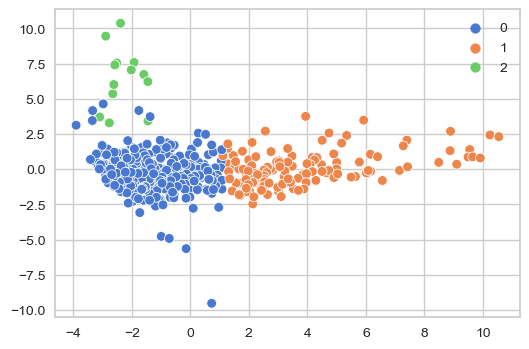

In [55]:
plt.figure(figsize=(6, 4))
_ = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, 
                    palette=sns.color_palette('muted', n_colors=3))

* To visualize PCA, we mae use of a *biplot*.

* A biplot plots the data on the components we have found.

* It also displays vectors that show how much each of the original features contributes to each principal component.

* The left and bottom axes of a biplot are the principal components.

* The right and top axes of a biplot show the contributions of the original features to the components, i.e., the loadings.

In [56]:
from math import ceil

# based on https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def biplot(score, coeff, text, labels=None):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(111, label='pcas')
    ax2 = fig.add_subplot(111, label='loading vectors', frame_on=False)
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()    
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    # draw scatterplot
    ax1.scatter(xs, ys, fc='k')
    for i, txt in enumerate(text):
        ax1.text(xs[i] + 0.05, ys[i], txt,
                    fontsize=12,
                    alpha=0.75,
                    c='blue')
    
    # draw loading vectors
    for i in range(n):
        ax2.arrow(0, 0, coeff[i,0] * 0.85, coeff[i,1] * 0.85, 
                  lw=1,
                  color = 'r',alpha = 0.5, head_width=0.025, head_length=0.025)
        if labels is None:
            ax2.text(coeff[i,0], coeff[i,1], "Var"+str(i+1), 
                     color = 'g', ha = 'center', va = 'center')
        else:
            ax2.text(coeff[i,0], coeff[i,1], 
                     labels[i], color = 'brown', ha = 'center', va = 'center',
                     fontsize=14)
    
    xmax = max(xs.min(), xs.max(), key=abs)
    xlim = 0.5 * ceil(2.0 * xmax)
    ax1.set_xlim(-xlim, xlim)
    ymax = max(ys.min(), ys.max(), key=abs)
    ylim = 0.5 * ceil(2.0 * ymax)
    ax1.set_ylim(-ylim, ylim)
    ax1.axhline(0, linestyle=':', color='k', lw=0.5) # horizontal lines
    ax1.axvline(0, linestyle=':', color='k', lw=0.5) # vertical lines
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)

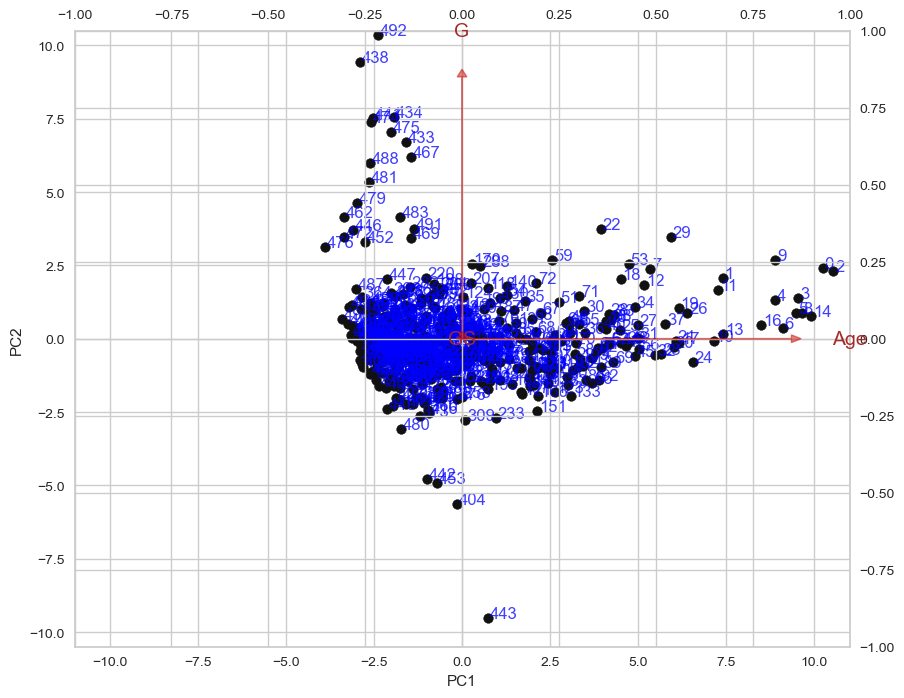

In [57]:
X_proj = pca.fit_transform(X)

biplot(X_proj,
       pca.components_.T,
       scaled_df.index,
       scaled_df.columns)

From the biplot it's clear that age (`Age`) and the number of games (`G`) played significantly impact the variance in the dataset, as indicated by their prominence in the principal component axes. Reasonable result highlighting the experience and fitness.

* Visualize the clusters is with *radar plots*.

* We'll write a function to plot them.

In [28]:
def radar_factory(keys, values, axes=None, fontsize=10, figsize=(5, 5)):
    
    import math
    
    if axes is None:
        # Initialise the spider plot.
        plt.figure(figsize=figsize)
        ax = plt.subplot(111, polar=True)
    else:
        ax = axes
        
    num_categories = len(keys)
 
    # What will be the angle of each axis in the plot? 
    # We divide the plot / number of variables + 1.
    # We add one because we want to do a complete circle.
    angles = np.arange(num_categories + 1)
    angles = angles / num_categories * 2 * np.pi 
    angles[-1] = angles[0]
 
    # We want the first axis to be on top.
    ax.set_theta_offset(np.pi / 2)
    # Theta direction is -1 clockwise,
    # and 1 counterclockwise
    ax.set_theta_direction(-1)
 
    # Draw one axis per variable and add x labels
    ax.tick_params(labelsize=fontsize)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(keys)
 
    # Draw y labels
    ax.set_rlabel_position(0)
    max_y = max(values)
    min_y = min(values)

    values.append(values[0])
    ax.plot(list(angles), values, 
            linewidth=1, linestyle='solid')

    ax.fill(angles, values, 'b', alpha=0.1)
    yticks = ax.get_yticks()
    ax.set_yticklabels([])
    ylims = ax.get_ylim()
    ax.set_ylim(min(yticks[0], ylims[0]), 
                max(yticks[-1], ylims[1]))

* Now we'll use a radar plot to project the centroid of each cluster in all dimensions.

* To make all dimensions comparable and all radar plots comparable, we'll scale all centroids between zero and one.

In [58]:
matrix_scaler = lambda a: (a - a.min()) / (a.max() - a.min())
cluster_centers = matrix_scaler(kmeans.cluster_centers_)

* It seems that this cluster contains players that have position indicators on.

* Indeed, as we can see, these indicators are not mutually exclusive as one might expect.

In [59]:
df.loc[:, 'C_pos':'WR_pos'].sum(axis=1).value_counts()

1    354
0    121
2     17
3      2
Name: count, dtype: int64

* Or we can plot all the clusters together.

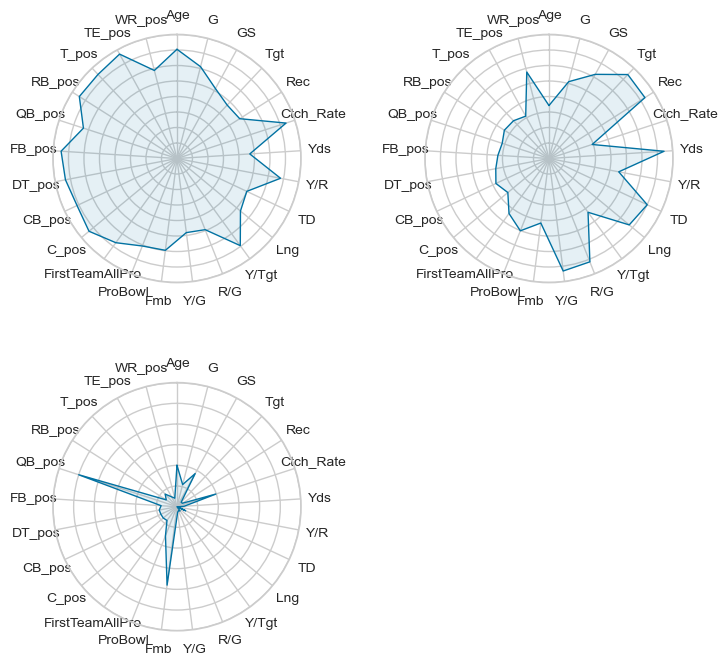

In [60]:
plt.figure(figsize=(2 * 4, 2 * 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
for i, cs in enumerate(cluster_centers):
    ax = plt.subplot(2, 2, i + 1, polar=True)
    radar_factory(scaled_df.columns, list(cs), axes=ax)

# NFL Player Performance Radar Charts

The provided image showcases three radar charts representing multivariate data on NFL player performance across a variety of attributes. Each chart likely corresponds to different player positions or group comparisons, with each axis or spoke representing distinct performance metrics.

## Key Attributes on Radar Charts

- `Age`: The player's age, an indicator of experience or physical prime.
- `G` (Games Count): The total number of games played, indicating durability and experience.
- `GS` (Games Started Count): How often the player is in the starting lineup, signifying importance to the team.
- `Tgt` (Number of Targets): Frequency the player is targeted in the passing game, showing involvement in the offensive strategy.
- `Rec` (Number of Receptions): Successful catches, a direct indicator of productivity in the passing game.
- `Ctch_Rate` (Catch Rate): Efficiency metric representing the percentage of receptions per target.
- `Yds` (Total Yards): Cumulative distance covered on successful plays, a measure of offensive production.
- `Y/R` (Yards per Reception): Average yards gained per reception, a measure of effectiveness and big-play capability.
- `TD` (Touchdowns): The number of touchdowns scored, a critical measure of scoring impact.
- `Lng` (Longest Catch): Longest single catch, indicative of big-play ability.
- `Y/Tgt` (Yards per Target): Average yards gained per target, an efficiency metric.
- `R/G` (Receptions per Game): Consistency metric showing average receptions per game.
- `Y/G` (Yards per Game): Average yards gained per game, indicating game-by-game impact.
- `Fmb` (Number of Fumbles): Ball security metric representing the number of times the player fumbled.
- `ProBowl`: Binary indicator of whether the player made the Pro Bowl, reflecting recognition and elite status.
- `FirstTeamAllPro`: Binary indicator of making the First Team All-Pro, denoting top-tier player performance.
- Position Indicators: Binary attributes such as `WR_pos`, `RB_pos`, `QB_pos`, etc., identifying the player's primary field position.

## Usage and Interpretation

These radar charts are instrumental for coaches, scouts, and analysts for:

- **Performance Assessment**: Evaluating strengths and weaknesses in multiple areas.
- **Player Comparison**: Visually comparing players within or across positions.
- **Game Strategy Development**: Utilizing player profiles for planning game tactics.
- **Recruitment and Drafting**: Informing decisions during player selection processes.


## Further progress of the project. Predicting NFL Game Outcomes, Player Injury Risks, and Performance

### 1. **Predicting Game Outcomes**
Analyzing historical data to identify factors influencing game outcomes.

#### Data Collection and Preprocessing
- Gather historical game scores, player and team stats, weather, and location.
- Handle missing values, encode categorical variables, and normalize features.

#### Feature Engineering
- Develop new features like team averages, player performance metrics, and home advantage.
- Time-based features: trends in team performance or player fitness.

#### Model Selection and Training
- Use models like logistic regression, random forests, or neural networks.
- Train on historical data to predict outcomes.
- Cross-validate to assess and tune the model.

#### Evaluation and Prediction
- Evaluate using accuracy, precision, recall, or AUC-ROC.
- Predict future game outcomes.

### 2. **Predicting Player Injury Risks**
Analyzing player data to identify factors increasing injury likelihood.

#### Data Collection and Preprocessing
- Collect data on player injuries, conditions, and health history.
- Ensure data consistency and completeness.

#### Feature Engineering
- Features related to activities, play style, game conditions, and training.
- Player-specific factors: age, previous injuries, recovery.

#### Model Selection and Training
- Suitable models for risk assessment (logistic regression, survival models).
- Train to predict injury probability.

#### Evaluation and Prediction
- Validate with historical data.
- Assess current players' injury risks.

### 3. **Predicting Player Performance**
Analyzing individual player stats and other influencing factors.

#### Data Collection and Preprocessing
- Collect performance metrics, physical and health data, training info.
- Process data for quality and relevance.

#### Feature Engineering
- Features encapsulating skills, condition, and game context.
- Team dynamics and opposition strength.

#### Model Selection and Training
- Regression, time series, or machine learning algorithms.
- Train on historical data for future performance predictions.

#### Evaluation and Prediction
- Evaluate accuracy with known performance data.
- Predict future player performance.

### Incorporating Big Data
- **Enhanced Analysis:** Utilize large and varied datasets for comprehensive analysis.
- **Real-time Insights:** Leverage real-time data processing for current insights.
- **Predictive Accuracy:** Improve predictive accuracy with larger datasets.

### General Considerations
- **Data Quality:** Emphasize accurate and relevant data.
- **Model Complexity:** Balance between complexity and resources.
- **Ethical Considerations:** Consider privacy in injury predictions.
- **Continuous Improvement:** Regularly update models with new data.
